<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAME OF SPEAKER   395 non-null    object
 1   DISCOUNTED PRICE  395 non-null    object
 2   M.R.P.            395 non-null    object
 3   DISCOUNT          395 non-null    object
 4   RATING            395 non-null    object
 5   NUMBER OF RATING  395 non-null    object
 6   URL OF SPEAKER    395 non-null    object
dtypes: object(7)
memory usage: 21.7+ KB
None
                                     NAME OF SPEAKER DISCOUNTED PRICE  M.R.P.  \
0  Tribit XSound Plus 2 30W 5.3 Bluetooth Wireles...           ?5,699  ?7,999   
1  Tribit[Upgraded Version XSound Go 16W 5.0 Blue...           ?2,799  ?3,499   
2  boAt Stone 180 5W Bluetooth Speaker with Upto ...           ?1,099  ?2,490   
3  Zebronics ZEB-COUNTY 3W Wireless Bluetooth Por...             ?499    ?999   
4  amazon basics X20G 16W Bluet

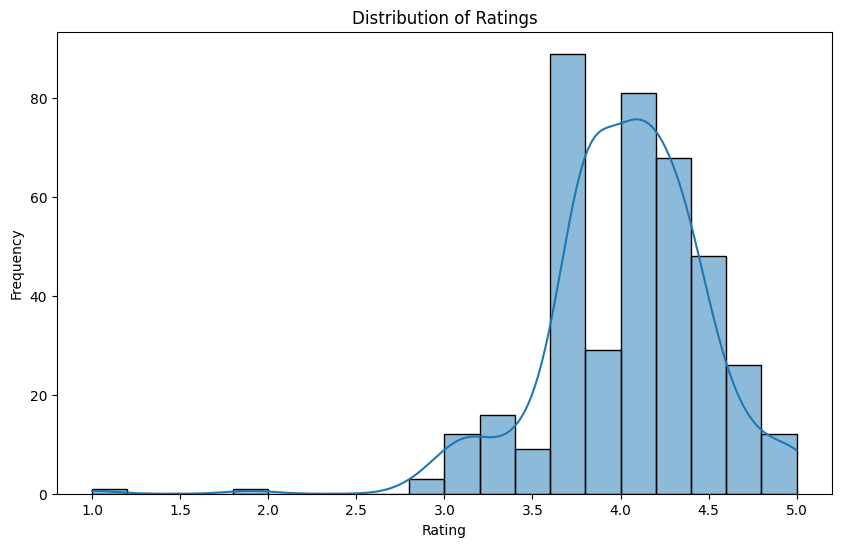

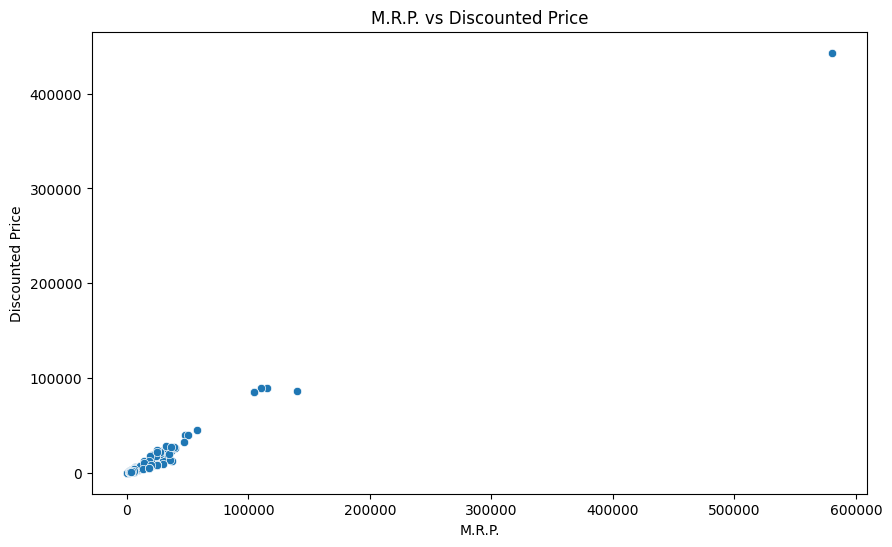

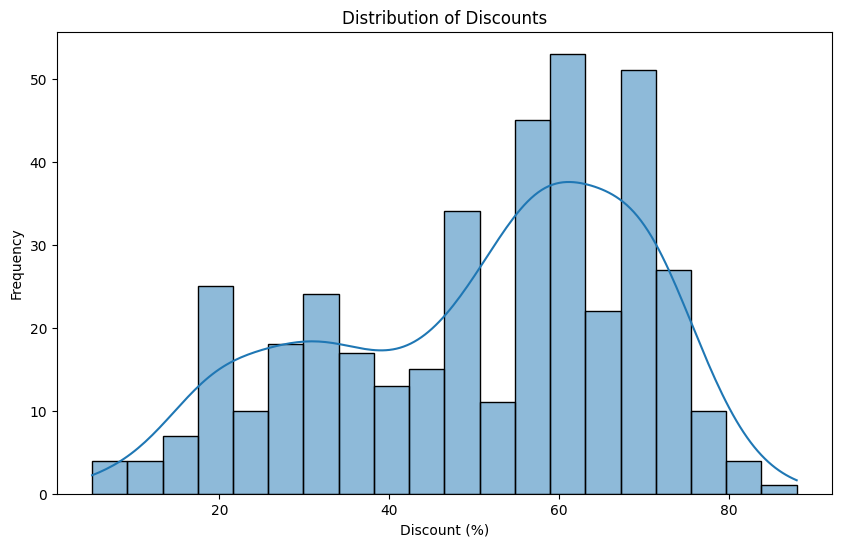

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
file_path = "/content/Copy of amazon_speakers_webscraping(1).csv"  # Replace with the actual path to your file
data = pd.read_csv(file_path, encoding='latin1')

# Display basic information about the dataset
print(data.info())

# Display the first few rows of the dataset
print(data.head())

# Summary statistics
print(data.describe(include='all'))

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Convert RATING to float
data['RATING'] = data['RATING'].str.extract(r'(\d+\.\d+)').astype(float)

# Convert NUMBER OF RATING to int after removing commas
data['NUMBER OF RATING'] = data['NUMBER OF RATING'].str.replace(',', '').astype(int)

# Convert DISCOUNTED PRICE and M.R.P. to int after removing currency symbols
data['DISCOUNTED PRICE'] = data['DISCOUNTED PRICE'].str.replace(r'[\?,]', '', regex=True).astype(int, errors='ignore')
data['M.R.P.'] = pd.to_numeric(data['M.R.P.'].str.replace(r'[\?,]', '', regex=True), errors='coerce')

# Convert DISCOUNT to percentage
data['DISCOUNT'] = data['DISCOUNT'].str.extract(r'(\d+)%').astype(float)

# Extract brand names
data['BRAND'] = data['NAME OF SPEAKER'].apply(lambda x: x.split()[0])

# Calculate total number of ratings for each brand
brand_ratings = data.groupby('BRAND')['NUMBER OF RATING'].sum().reset_index()

# Calculate market share for each brand
total_ratings = brand_ratings['NUMBER OF RATING'].sum()
brand_ratings['MARKET SHARE'] = (brand_ratings['NUMBER OF RATING'] / total_ratings) * 100

# Display the brand ratings and market share
print(brand_ratings)

# Get top 5 best-selling speakers for each brand
top_5_speakers = data.groupby('BRAND').apply(lambda x: x.nlargest(5, 'NUMBER OF RATING')).reset_index(drop=True)

# Display the top 5 best-selling speakers for each brand
print(top_5_speakers)

# Define price ranges
bins = [0, 2000, 4000, 6000, 8000, 10000, float('inf')]
labels = ['0-2K', '2K-4K', '4K-6K', '6K-8K', '8K-10K', '10K+']
data['PRICE RANGE'] = pd.cut(data['M.R.P.'], bins=bins, labels=labels)

# Identify top rated speakers within each price range
top_rated_per_price_range = data.groupby('PRICE RANGE').apply(lambda x: x.nlargest(1, 'RATING')).reset_index(drop=True)

# Display the top rated speakers per price range
print(top_rated_per_price_range)

# Plotting the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['RATING'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Relationship between M.R.P. and discounted price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['M.R.P.'], y=data['DISCOUNTED PRICE'])
plt.title('M.R.P. vs Discounted Price')
plt.xlabel('M.R.P.')
plt.ylabel('Discounted Price')
plt.show()

# Distribution of discounts
plt.figure(figsize=(10, 6))
sns.histplot(data['DISCOUNT'], bins=20, kde=True)
plt.title('Distribution of Discounts')
plt.xlabel('Discount (%)')
plt.ylabel('Frequency')
plt.show()

# Top rated speakers
top_rated = data.nlargest(10, 'RATING')

fig = px.bar(top_rated, x='NAME OF SPEAKER', y='RATING', title='Top 10 Rated Speakers')
fig.show()

# Plotting the market share of top-selling brands
fig = px.pie(brand_ratings, names='BRAND', values='MARKET SHARE', title='Market Share of Top-Selling Brands')
fig.show()
